# Polynomial Regression

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
test_filename="II4035-regresi-test.csv"
train_filename="II4035-regresi-train.csv"

training=np.genfromtxt(train_filename,delimiter=',',skip_header=1)
test    =np.genfromtxt(test_filename,delimiter=',',skip_header=1)

In [3]:
train_x=training[:,1]
train_y=training[:,2]
test = test[:,1]

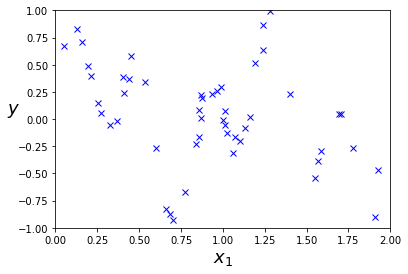

In [4]:
# plot dengan matplotlib. manual: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(train_x, train_y, "bx") # blue line
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -1, 1])
plt.show()

In [5]:
x = train_x[:, np.newaxis]
y = train_y[:, np.newaxis]
test = test[:, np.newaxis]

In [6]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)
test_poly = polynomial_features.fit_transform(test)

In [7]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
predicted = model.predict(test_poly)

In [8]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

0.3369043857575561
0.447474908833392


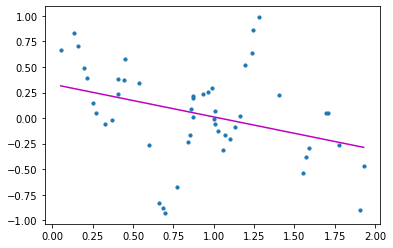

In [9]:
# Underfit

polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
    
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

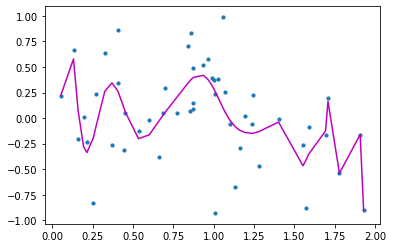

In [10]:
# Overfit

polynomial_features= PolynomialFeatures(degree=30)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
    
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

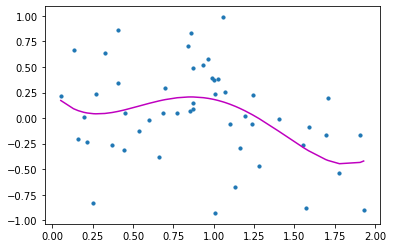

In [11]:
# Optimal

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
    
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [12]:
from numpy import asarray
from numpy import savetxt
# define data
data = predicted
# save to csv file
savetxt('hasilprediksi_PolynomialRegression.csv', data, delimiter=',')